<a href="https://colab.research.google.com/github/AyaAhmed01/Machine-Learning-Projects/blob/main/Clustering_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aya Emad Fouad Ahmed
# B.N: 18
--------

# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [ ]:
!pip3 install pyclustering

     |████████████████████████████████| 2.6 MB 10.3 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=0965c7a60400f9a3cdbff7cf335c11b252dcb1ddf829a38e94b8c5cc32b9b119
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Questoin 1
Scatter plot the dataset

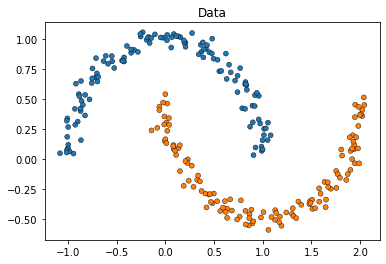

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

# x, y: Variables that specify positions on the x and y axes.
# hue: vector or key in data Grouping variable that produces points with different colors. Can be either categorical or numeric

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

It will do poorly because the data is classified in non-convex shape and K-Means try to make spherical-like clusters

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

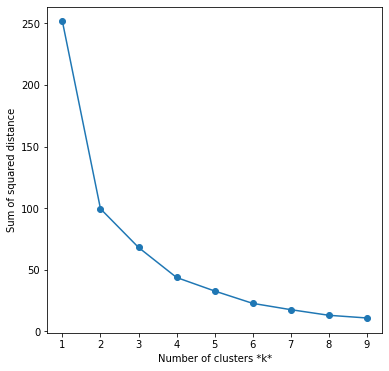

In [ ]:
sse = []    # sum of squared distance between data points and their clusters' assigned centroids
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
# Train k-mean model
km = KMeans(n_clusters=2)
km.fit(X)
print(km.score(X))  # get the score on the training data

# COMMENT:
# The clustering performance is better when using k = 2 as due to Elbow method it is the best value where the curve starts getting flatten out

-99.48652012837258


# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

Amount of clusters: 2


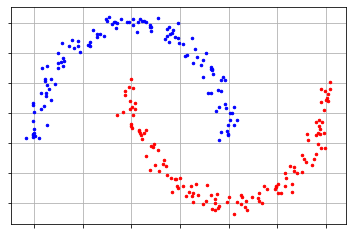

In [ ]:
from matplotlib.cbook import index_of
# A unit is dense if the data points in this are exceeding the threshold value. To treat outliers as a noise threshold value should be increased
# After some trials, found the best interval, threshold are 8, 0.


def run_clique(intervals, threshold, data):
    clique_instance = clique(data, intervals, threshold)
    # start clustering process and obtain results
    clique_instance.process()
    clusters = clique_instance.get_clusters()  # allocated clusters
    noise = clique_instance.get_noise()        # points that are considered as outliers (in this example should be empty)
    cells = clique_instance.get_cells()        # CLIQUE blocks that forms grid
    print("Amount of clusters:", len(clusters))
    # visualize clustering results
    # clique_visualizer.show_grid(cells, data)    # show grid that has been formed by the algorithm
    clique_visualizer.show_clusters(data, clusters, noise)  # show clustering results

intervals = 8    # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
run_clique(intervals, threshold, X)

It performed better as it's density-based and grid-based, and the data is well separated by horizontal and vertical boundries however doesn't have convex shape. So with good choice of threshold and interval the clique performs better.

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

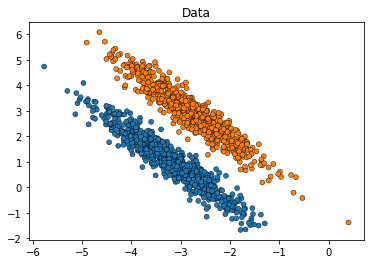

In [ ]:
# visualize data
sns.scatterplot(
    x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

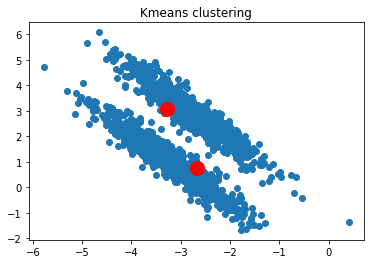


Clique clustering

Amount of clusters: 4


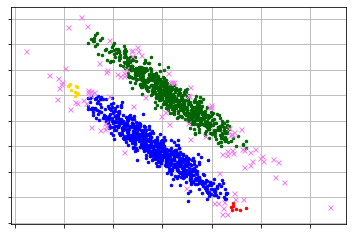

In [ ]:
# Run and plot kmeans algorithm
kmeans = KMeans(n_clusters=2)
pred_y = kmeans.fit_predict(X_aniso)
# Plot the data
plt.scatter(X_aniso[:,0], X_aniso[:,1])
# Plot the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200,                             # Set centroid size
            c='red')                          # Set centroid color
plt.title("Kmeans clustering")
plt.show()

# Run and plot clique algorithm using interval = 15 and threshold = 6
print("\nClique clustering\n")
run_clique(15, 6, X_aniso)

# What is the number of clusters in case of clique? and why?
There are 4 clusters, because the large values of interval=15 and threshold=6 considered many points as outlieres and separated the dense units
# Why do kmeans fail to cluster such data?
After the transformation, the data clusters' shape became non-spherical and flattened out so the kmeans was affected by outliers and the centers of clusters deviated.

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
# ATTENTION: the following 2 answers aren't totally my own from scratch, I searched the concept and "implementations" to understand the algorithm

import numpy as np

def pca(X, n):    # n is the number of final dimensions
    # step1: mean Centering the data
    X_meaned = X - np.mean(X , axis = 0)  # axis 0 is the “first” axis, calculate mean from first column

    # step2: calculating the covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_meaned , rowvar = False)
    # The covariance matrix is a square matrix denoting the covariance of the elements with each other. The covariance of an element with itself is its Variance.
    # So the diagonal elements of a covariance matrix are the variance of the elements.
    # rowvar = False so each column represents a variable, while the rows contain observations.

    # step3: Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    # The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.
    # A Higher Eigenvalue corresponds to a higher variability

    # step4: Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.
    # The first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.
    sorted_index = np.argsort(eigen_values)[::-1]
    # np.argsort(eigen_values) -> returns array of indices of elements in ascending order. Use [::-1] to flip them for descending
    sorted_eigenvalue = eigen_values[sorted_index]
    #similarly sort the eigenvectors
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    # step5: select the first n eigenvectors, n is desired dimension of final reduced data.
    eigenvector_subset = sorted_eigenvectors[:,0:n]

    # step5: Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

    return {"sorted eigenvectors": eigenvector_subset, "sorted eigenvalues": sorted_eigenvalue, "transformed data": X_reduced}

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [ ]:
def knn(k, data):

  tol=0.001       # The maximum allowed tolerance
  max_iter=300    # maximum allowed iterations
  centroids = {}

  # choose starting random centroids
  for i in range(k):
      centroids[i] = data[i]
  # iterate the process max_iter
  for i in range(max_iter):
      classifications = {}
      # initialize clusters
      for i in range(k):
          classifications[i] = []

      # calculate distances of all data points from all centroids and classify based on Euclidian distance
      for featureset in data:
          distances = [np.linalg.norm(featureset-centroids[centroid]) for centroid in centroids]  # distances: the distances of one point to all clusters' centroids
          classification = distances.index(min(distances))
          classifications[classification].append(featureset)

      prev_centroids = dict(centroids)   # create dictionary of previous centroids

      # generate new centroids from mean of current cluster points
      for classification in classifications:
          centroids[classification] = np.mean(classifications[classification],axis=0)

      # check if the difference between current and previous iteration is optimized
      optimized = True
      for c in centroids:
          original_centroid = prev_centroids[c]
          current_centroid = centroids[c]
          if np.sum((current_centroid-original_centroid)/original_centroid) > tol:
              optimized = False

      if optimized:
          break
  return centroids

In [ ]:
print(knn(2, X))

{0: array([-8.93950323, -5.51160524]), 1: array([-4.58881345,  0.02187336])}
